In [1]:
import pandas as pd
import json

In [2]:
# Step 1: Check CSV
csv_path = 'Data/tree-loss-provincewise-2001-2023.csv'
df_csv = pd.read_csv(csv_path)
print("CSV Dataset Preview:")
print(df_csv.head())
print("\nCSV Columns:", df_csv.columns.tolist())

CSV Dataset Preview:
  country subnational1  threshold  area_ha  extent_2000_ha  extent_2010_ha  \
0   Nepal      Central          0  2746667         2746667         2746667   
1   Nepal      Central         10  2746667         1253579         1262426   
2   Nepal      Central         15  2746667         1217678         1204804   
3   Nepal      Central         20  2746667         1206665         1195016   
4   Nepal      Central         25  2746667         1192215         1163339   

   gain_2000-2020_ha  tc_loss_ha_2001  tc_loss_ha_2002  tc_loss_ha_2003  ...  \
0              49545              508              479              738  ...   
1              49545              470              427              654  ...   
2              49545              463              414              636  ...   
3              49545              457              407              624  ...   
4              49545              451              401              614  ...   

   tc_loss_ha_2014  tc_loss_h

In [3]:
# Step 2: Check JSON
json_path = 'Data/NPL-weather-from 1950-2023.json'
with open(json_path) as f:
    treeloss_data = json.load(f)

print("\nJSON Keys/Structure:")
print(treeloss_data.keys() if isinstance(treeloss_data, dict) else type(treeloss_data))



JSON Keys/Structure:
dict_keys(['metadata', 'data'])


In [4]:
# Let's explore the 'data' key in the JSON
print("Type of 'data' key:", type(treeloss_data['data']))

# If it's a list, print the first item
if isinstance(treeloss_data['data'], list):
    print("\nFirst record in 'data':")
    print(treeloss_data['data'][0])
elif isinstance(treeloss_data['data'], dict):
    print("\nKeys inside 'data':")
    print(treeloss_data['data'].keys())
else:
    print("\nUnknown structure inside 'data'.")


Type of 'data' key: <class 'dict'>

Keys inside 'data':
dict_keys(['hd35', 'pr', 'tas'])


In [5]:
# Let's check the type and first few values in 'pr' key
print("Type of 'pr':", type(treeloss_data['data']['pr']))

# If it’s a list, print the first few items
if isinstance(treeloss_data['data']['pr'], list):
    print("First few items in 'pr':", treeloss_data['data']['pr'][:5])
elif isinstance(treeloss_data['data']['pr'], dict):
    print("Keys inside 'pr':", treeloss_data['data']['pr'].keys())
else:
    print("Unknown structure for 'pr'.")


Type of 'pr': <class 'dict'>
Keys inside 'pr': dict_keys(['NPL'])


In [6]:
# Check type and sample of the precipitation data for Nepal
print("Type of 'pr'['NPL']:", type(treeloss_data['data']['pr']['NPL']))

# If it’s a list, show the first 5 items
if isinstance(treeloss_data['data']['pr']['NPL'], list):
    print("First 5 precipitation values:", treeloss_data['data']['pr']['NPL'][:5])
elif isinstance(treeloss_data['data']['pr']['NPL'], dict):
    print("Keys inside 'pr'['NPL']:", treeloss_data['data']['pr']['NPL'].keys())
else:
    print("Unknown structure inside 'pr'['NPL'].")


Type of 'pr'['NPL']: <class 'dict'>
Keys inside 'pr'['NPL']: dict_keys(['1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06', '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12', '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06', '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12', '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06', '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12', '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06', '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12', '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06', '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12', '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06', '1955-07', '1955-08', '1955-09', '1955-10', '1955-11', '1955-12', '1956-01', '1956-02', '1956-03', '1956-04', '1956-05', '1956-06', '1956-07', '1956-08', '1956-09', '1956-10', '1956-11', '1956-12', '195

In [7]:
# Convert precipitation dictionary to a DataFrame
import pandas as pd

# Extract the precipitation data
precip_dict = treeloss_data['data']['pr']['NPL']

# Convert to DataFrame
precip_df = pd.DataFrame(list(precip_dict.items()), columns=['Date', 'Precipitation'])

# Convert 'Date' column to datetime format
precip_df['Date'] = pd.to_datetime(precip_df['Date'])

# Check the result
print(precip_df.head())
print(precip_df.tail())


        Date  Precipitation
0 1950-01-01          68.81
1 1950-02-01         105.93
2 1950-03-01         103.13
3 1950-04-01          31.20
4 1950-05-01         100.59
          Date  Precipitation
883 2023-08-01         448.46
884 2023-09-01         196.90
885 2023-10-01          99.59
886 2023-11-01          18.61
887 2023-12-01          21.11


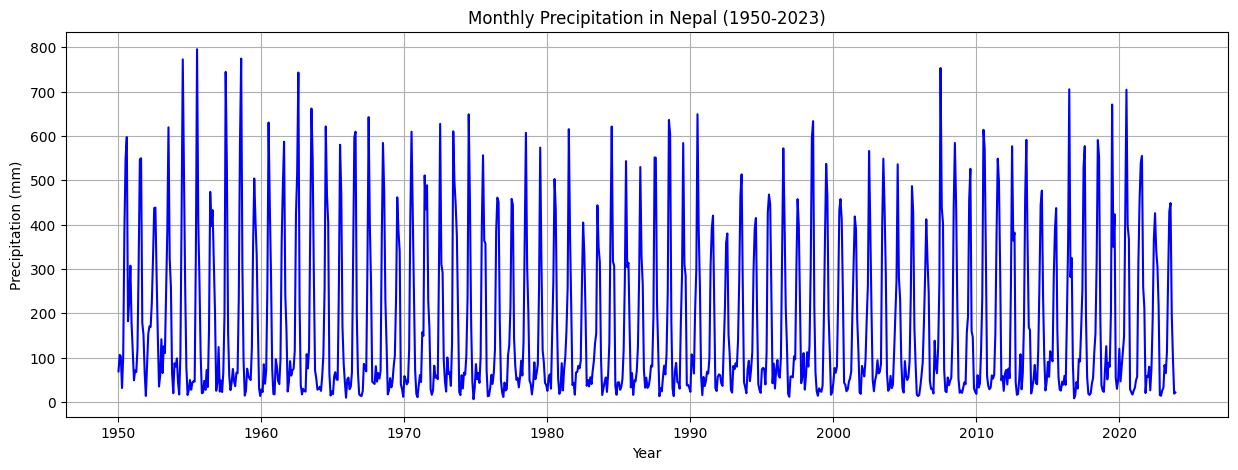

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(precip_df['Date'], precip_df['Precipitation'], color='blue')
plt.title('Monthly Precipitation in Nepal (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


You are seeing a time-series plot showing how precipitation has changed from 1950 to 2023.

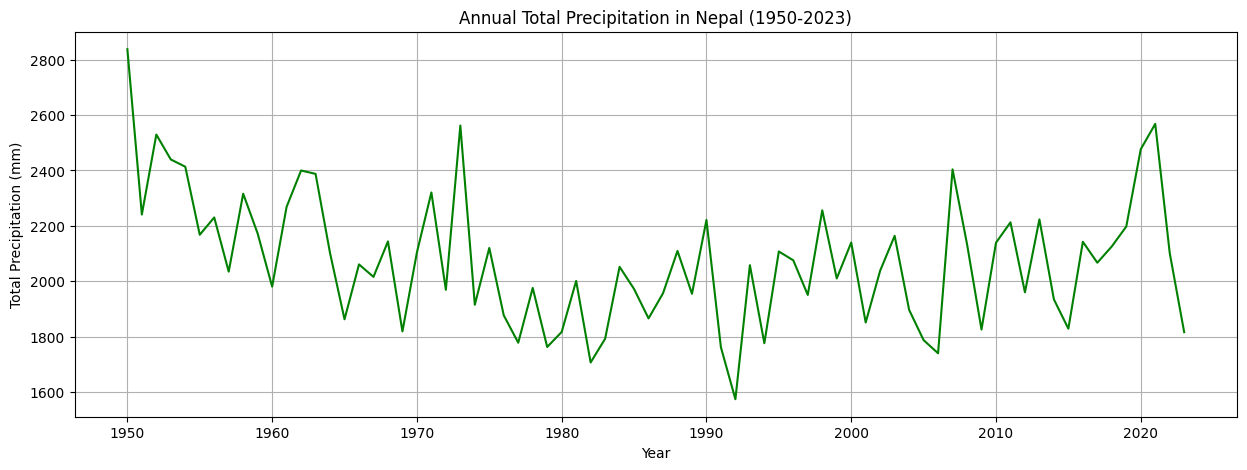

In [9]:
# Add a Year column
precip_df['Year'] = precip_df['Date'].dt.year

# Calculate total precipitation per year
annual_precip = precip_df.groupby('Year')['Precipitation'].sum().reset_index()

# Plot annual precipitation
plt.figure(figsize=(15,5))
plt.plot(annual_precip['Year'], annual_precip['Precipitation'], color='green')
plt.title('Annual Total Precipitation in Nepal (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.show()


CSV Data EDA Tasks (Forest Loss / Land Cover CSV)

In [12]:
import pandas as pd

csv_df = pd.read_csv('Data/tree-loss-provincewise-2001-2023.csv')  # Replace with your actual CSV filename

csv_df.describe(include='all')


,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
count,40,40,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
unique,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nepal,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.125000,2.953250e+06,1.201386e+06,1.137633e+06,34801.600000,292.075000,409.275000,434.750000,...,234.525000,125.375000,213.975000,478.675000,345.450000,427.975000,474.925000,577.350000,425.525000,488.600000
std,NaN,NaN,22.777843,7.428873e+05,7.708511e+05,7.913446e+05,9174.445146,105.586612,303.621052,248.591494,...,164.930597,186.752639,199.629848,413.837847,226.950345,256.700013,301.189129,332.176239,258.974802,253.907494
min,NaN,NaN,0.000000,1.974934e+06,2.108300e+05,1.682020e+05,24558.000000,58.000000,44.000000,11.000000,...,26.000000,6.000000,21.000000,35.000000,42.000000,78.000000,72.000000,125.000000,70.000000,126.000000
25%,NaN,NaN,13.750000,2.746667e+06,8.897408e+05,8.223522e+05,26094.000000,216.500000,148.000000,310.750000,...,134.500000,25.500000,79.500000,120.750000,210.750000,205.500000,250.750000,361.500000,210.250000,322.250000
50%,NaN,NaN,22.500000,2.848465e+06,9.593120e+05,9.168900e+05,35610.000000,303.000000,399.000000,436.500000,...,175.500000,42.000000,139.500000,308.000000,254.500000,399.500000,426.500000,490.500000,367.500000,484.500000
75%,NaN,NaN,35.000000,2.946930e+06,1.275108e+06,1.201372e+06,38201.000000,335.250000,504.500000,627.000000,...,253.250000,72.250000,254.000000,901.250000,372.250000,504.250000,574.000000,646.000000,580.750000,583.000000


In [13]:
csv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            40 non-null     object
 1   subnational1       40 non-null     object
 2   threshold          40 non-null     int64 
 3   area_ha            40 non-null     int64 
 4   extent_2000_ha     40 non-null     int64 
 5   extent_2010_ha     40 non-null     int64 
 6   gain_2000-2020_ha  40 non-null     int64 
 7   tc_loss_ha_2001    40 non-null     int64 
 8   tc_loss_ha_2002    40 non-null     int64 
 9   tc_loss_ha_2003    40 non-null     int64 
 10  tc_loss_ha_2004    40 non-null     int64 
 11  tc_loss_ha_2005    40 non-null     int64 
 12  tc_loss_ha_2006    40 non-null     int64 
 13  tc_loss_ha_2007    40 non-null     int64 
 14  tc_loss_ha_2008    40 non-null     int64 
 15  tc_loss_ha_2009    40 non-null     int64 
 16  tc_loss_ha_2010    40 non-null     int64 
 17 

In [17]:
#Check for missing value:
csv_df.isnull().sum()
csv_df.head()
csv_df.describe()



,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
count,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,28.125000,2.953250e+06,1.201386e+06,1.137633e+06,34801.600000,292.075000,409.275000,434.750000,472.850000,529.750000,...,234.525000,125.375000,213.975000,478.675000,345.450000,427.975000,474.925000,577.350000,425.525000,488.600000
std,22.777843,7.428873e+05,7.708511e+05,7.913446e+05,9174.445146,105.586612,303.621052,248.591494,224.280451,262.274739,...,164.930597,186.752639,199.629848,413.837847,226.950345,256.700013,301.189129,332.176239,258.974802,253.907494
min,0.000000,1.974934e+06,2.108300e+05,1.682020e+05,24558.000000,58.000000,44.000000,11.000000,114.000000,132.000000,...,26.000000,6.000000,21.000000,35.000000,42.000000,78.000000,72.000000,125.000000,70.000000,126.000000
25%,13.750000,2.746667e+06,8.897408e+05,8.223522e+05,26094.000000,216.500000,148.000000,310.750000,249.000000,290.500000,...,134.500000,25.500000,79.500000,120.750000,210.750000,205.500000,250.750000,361.500000,210.250000,322.250000
50%,22.500000,2.848465e+06,9.593120e+05,9.168900e+05,35610.000000,303.000000,399.000000,436.500000,435.500000,550.000000,...,175.500000,42.000000,139.500000,308.000000,254.500000,399.500000,426.500000,490.500000,367.500000,484.500000
75%,35.000000,2.946930e+06,1.275108e+06,1.201372e+06,38201.000000,335.250000,504.500000,627.000000,638.250000,767.500000,...,253.250000,72.250000,254.000000,901.250000,372.250000,504.250000,574.000000,646.000000,580.750000,583.000000
max,75.000000,4.249253e+06,4.249253e+06,4.249253e+06,49545.000000,508.000000,1036.000000,833.000000,1082.000000,944.000000,...,760.000000,795.000000,813.000000,1426.000000,1099.000000,1157.000000,1413.000000,1624.000000,1370.000000,1440.000000
